This notebook implements the simple linear regression via the old fashioned way, and then by gradient descent.

In [1]:
import numpy as np

# for plots, cause visuals
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# the data

First, we need data:

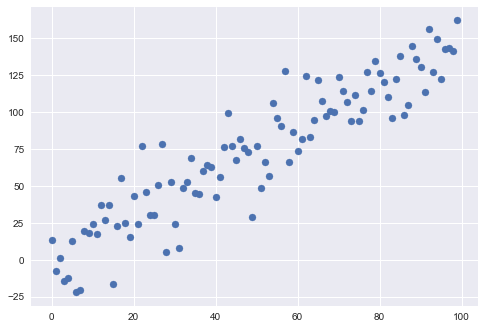

In [557]:
x_points = np.arange(0,100)
y_points = x*1.5 + np.random.normal(size=len(x))*15 #np.random.randint(0,40,len(x))
plt.scatter(x_points,y_points);

# simple linear regression

Since this is a simple 1 variable regression, the solution will be `y = mx + b` where y are the predicted points, m is the gradient of the line and b is the y-intercept.

So a first a helper function to return predicted values given a lines `m` and `b`:

In [393]:
def predict(x, m=0, b=0):
    """takes in array or list x, gradient m and y-intercept b 
    and returns a list of preddicted values"""
    return [m*point + b for point in x]

Now another function to calculate the regression error. We minus the prediction from actual values and square them (so negatives and pluses don't cancel out) and add them all up.

In [562]:
def regression_error(m, b, x, y):
    """takes in gradient m and y-intercept b and 
    arrays x and y which are the actual datapoints and returns cost"""
    cost = 0
    preds = predict(x, m, b)
    for i in range(len(x)):
        cost += (y[i] - preds[i]) ** 2 
    return cost

regression_error(m, b, x_points, y_points)

31432.930450152122

Lets eyeball a guessed a regression line vs the actual data:

Total Error: 180,856.41


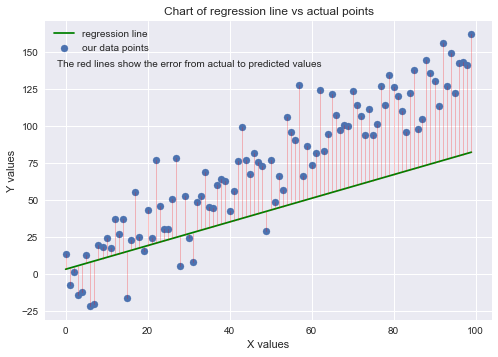

In [560]:
def plot(x, y, Ypreds):
    """takes in data points x,y and regression line predictions Ypreds
    and draws a scatter plot of x,y, the regression line X,Y
    and then draws a line from each point x,y and x,Ypreds"""
    
    plt.title("Chart of regression line vs actual points")
    # plot scatter plot of actual values
    plt.scatter(x, y, label="our data points");
    
    # plot the regression line
    plt.plot(x, Ypreds, label="regression line", color="g")
    
    # plot line from points to regression line to show diff
    # there must be faster way to do this instead of a for loop
    for i in range(len(x)):
        x1, y1 = [x[i], x[i]], [y[i], Ypreds[i]]
        plt.plot(x1,y1, color="r", alpha=0.3, linewidth=0.8)
    
    plt.text(-2,140,"The red lines show the error from actual to predicted values", fontsize=10)
    plt.xlabel("X values"), plt.ylabel("Y values")
    plt.legend()
    plt.show()
    
# lets look at a sample regression line with m=0.8 and b=0.3
print(f"Total Error: {regression_error(0.8, 0.3, x_points, y_points):,.2f}")
plot(x_points, y_points, predict(x, 0.8 ,3))

It's pretty clear visually that my eyeballed line of best fit could defintely be better.

Since this is a simple linear regression, the solution will be a line `y=mx + b` where m is the slope of the line and b is the y intercept. Now we can math the solution quite easily as per [wikipedia](https://en.wikipedia.org/wiki/Simple_linear_regression) and [khan academy](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/regression-line-example):

Total Error: 31,150.80
Gradient 1.475, Intercept 0.303


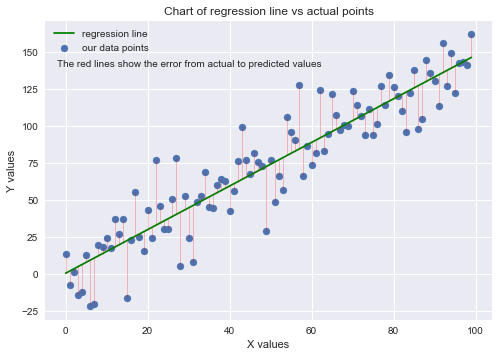

In [567]:
def simple_linear_regression_closed_form(x,y):
    """takes arrays of x,y and returns gradient m and y-intercept b"""
    # calculating all the variables we need
    # see https://en.wikipedia.org/wiki/Simple_linear_regression for equation
    n = len(x)
    xhat = np.mean(x) # avg of all the x points
    yhat = np.mean(y) # avg of all the y points
    xyhat = np.mean(np.array(x) * np.array(y)) # avg of all the x*y points
    xsqrhat = np.mean(np.array(x)**2) # avg of all the x squared points
    
    # now applying the formulas to get m and b
    m = (xhat*yhat - xyhat) / (xhat**2 - xsqrhat)
    b = yhat - m * xhat
    return m,b

m, b = simple_linear_regression_closed_form(x_points,y_points)
print(f"Total Error: {regression_error(m, b, x_points, y_points):,.2f}")
print(f"Gradient {m:.3f}, Intercept {b:.3f}")
plot(x_points, y_points, predict(x_points,m,b))

Hot diggity damn, it looks pretty good! now to double check this plot by comparing it to seaborn's built in regression function:

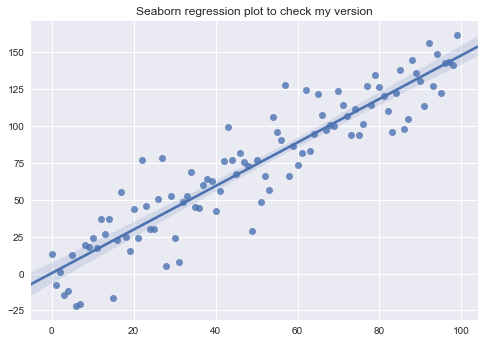

In [568]:
sns.regplot(x_points, y_points)
plt.title("Seaborn regression plot to check my version");

Looks about right, at least in the eyeball version.

# Simple Linear Regression via Gradient Descent

Gradient descent finds the solution by descending towards the right number. In this case where we're doing simple linear regression, we are trying to find the gradient and y-intercept of a (the famous `y = mx + b` equation) such that it minimizes the cost of that line.

So here, we start of with the simplest possible line where m and b are both 0, calculate the slope at that x position, and change x in the opposite direction of the slope, i.e `x = x - slope`. We keep doing that untill the slope is zero.

So heres the data and our starting line:

The error: 750,128.729


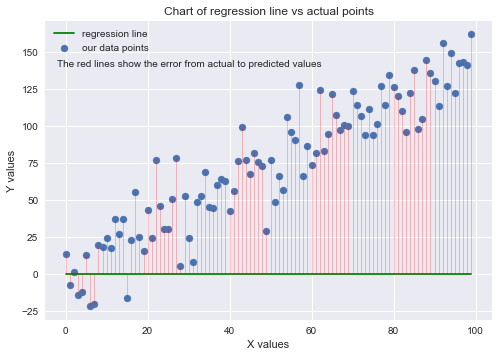

In [572]:
print(f"The error: {regression_error(0, 0, x_points, y_points):,.3f}")
plot(x_points, y_points, predict(x_points, m=0, b=0))

So it's obvious our line is very far from fitting the observed data. So for simple gradient descent the most import bit is calculating the gradients down which to adjust our m and b values. The formula goes:


![](images/gradient_delta.png)

Epoch  0, Cost 115,813.97            Gradient: 0.972, Intercept: 0.0147
Epoch  1, Cost  41,121.87            Gradient: 1.305, Intercept: 0.0197
Epoch  2, Cost  32,326.69            Gradient: 1.420, Intercept: 0.0214
Epoch  3, Cost  31,291.03            Gradient: 1.459, Intercept: 0.0221
Epoch  4, Cost  31,169.08            Gradient: 1.472, Intercept: 0.0223
Epoch  5, Cost  31,154.72            Gradient: 1.477, Intercept: 0.0224
Epoch  6, Cost  31,153.03            Gradient: 1.479, Intercept: 0.0224
Epoch  7, Cost  31,152.83            Gradient: 1.479, Intercept: 0.0224
Epoch  8, Cost  31,152.81            Gradient: 1.479, Intercept: 0.0224
Epoch  9, Cost  31,152.81            Gradient: 1.479, Intercept: 0.0224
Epoch 10, Cost  31,152.81            Gradient: 1.479, Intercept: 0.0225
Epoch 11, Cost  31,152.81            Gradient: 1.479, Intercept: 0.0225
Epoch 12, Cost  31,152.81            Gradient: 1.479, Intercept: 0.0225
Epoch 13, Cost  31,152.81            Gradient: 1.479, Intercept:

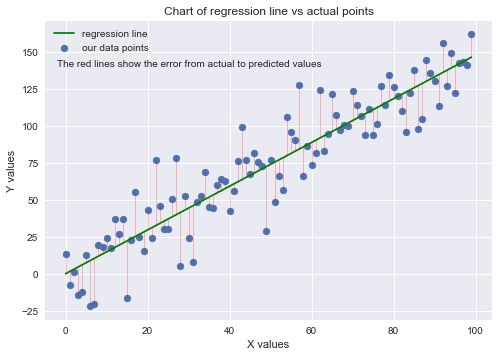

In [603]:
epochs = 15
learning_rate = 0.0001

m, b = 0, 0
n = len(x_points)

for epoch in range(epochs):
    m_gradient = 0
    b_gradient = 0
    preds = predict(x_points, m, b)
    for i in range(n):
        error = y_points[i] - (m*x_points[i] + b) # shouldn't really matter whether its the other way
        m_gradient += -x_points[i] * error
        b_gradient += -error
    
    m -= (2/n) * m_gradient * learning_rate
    b -= (2/n) * b_gradient * learning_rate
    
    print(f"Epoch {epoch:2}, Cost {regression_error(m,b, x_points, y_points):10,.2f}\
            Gradient: {m:.3f}, Intercept: {b:.4f}")

print(f"---Final Values---")
print(f"Gradient: {m:.3f}, Intercept: {b:.4f}")
plot(x_points, y_points, predict(x_points, m, b))    

So this solution has a higher cost than the one above, so something fishy is going on! Check!

According to numpy and my own simple linear regression above it should be:

In [598]:
np.polyfit(x_points, y_points, 1)

array([ 1.47517874,  0.3032751 ])